In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
def load_dataset(train_batch_size, test_batch_size):
    training_data = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.Resize((28, 28)),
                           transforms.ToTensor()
                       ])),
        batch_size=train_batch_size, shuffle=True)

    testing_data = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=False, transform=transforms.Compose([
            transforms.Resize((28, 28)),
            transforms.ToTensor()
        ])),
        batch_size=test_batch_size, shuffle=True)

    return training_data, testing_data


In [3]:
class CustomNet(nn.Module):
    def __init__(self):
        super(CustomNet, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 8, 3)
        self.conv2 = nn.Conv2d(8, 32, 3)
        self.fc1 = nn.Linear(32 * 5 * 5, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [4]:
# Function to calculate model parameters
def compute_params(model_name, model_instance):
    total_params = sum(p.numel() for p in model_instance.parameters())
    print(f'{model_name}: {total_params}')
    return total_params

In [5]:
# Optimizer initialization
def configure_optimizer(model_instance):
    return optim.SGD(model_instance.parameters(), lr=1e-2, momentum=0.9, nesterov=True)

In [6]:
# Model training function
def train_model(model_instance, optimizer_instance, dataset):
    model_instance.train()
    for batch_idx, (inputs, targets) in enumerate(dataset):
        inputs, targets = Variable(inputs), Variable(targets)
        optimizer_instance.zero_grad()
        outputs = model_instance(inputs)
        loss_fn = nn.CrossEntropyLoss()
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer_instance.step()

In [7]:
# Accuracy and loss calculation
def evaluate_model(model_instance, data_loader):
    correct_predictions = 0
    total_samples = 0
    cumulative_loss = 0
    num_batches = 0
    loss_fn = nn.CrossEntropyLoss()

    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model_instance(inputs)
            loss = loss_fn(outputs, targets)
            cumulative_loss += loss.item()
            num_batches += 1
            predicted = torch.argmax(outputs, dim=1)
            correct_predictions += (predicted == targets).sum().item()
            total_samples += targets.size(0)
    
    avg_loss = cumulative_loss / num_batches
    accuracy = correct_predictions / total_samples
    return avg_loss, round(accuracy, 3)

In [8]:
# Training configuration
total_epochs = 28

def execute_training(model_instance, optimizer_instance, train_data, test_data):
    training_losses = []
    testing_losses = []
    training_accuracies = []
    testing_accuracies = []
    
    print('Starting model training...')

    for epoch in range(1, total_epochs + 1):
        train_model(model_instance, optimizer_instance, train_data)
        
        train_loss, train_accuracy = evaluate_model(model_instance, train_data)
        test_loss, test_accuracy = evaluate_model(model_instance, test_data)
        
        training_losses.append(train_loss)
        testing_losses.append(test_loss)
        training_accuracies.append(train_accuracy)
        testing_accuracies.append(test_accuracy)
        
        print(f'Epoch {epoch}, Test Loss: {test_loss}')

    print('Model training complete.')
    return training_losses, testing_losses, training_accuracies, testing_accuracies

In [9]:
# Data loading and model training for different batch sizes
train_data_75, test_data_75 = load_dataset(75, 75)
model_A = CustomNet()
optimizer_A = configure_optimizer(model_A)
train_losses_A, test_losses_A, train_acc_A, test_acc_A = execute_training(model_A, optimizer_A, train_data_75, test_data_75)

train_data_500, test_data_500 = load_dataset(500, 500)
model_B = CustomNet()
optimizer_B = configure_optimizer(model_B)
train_losses_B, test_losses_B, train_acc_B, test_acc_B = execute_training(model_B, optimizer_B, train_data_500, test_data_500)

Starting model training...
Epoch 1, Test Loss: 0.10133314213312383
Epoch 2, Test Loss: 0.06171789437310019
Epoch 3, Test Loss: 0.04774198284174608
Epoch 4, Test Loss: 0.04072995652677491
Epoch 5, Test Loss: 0.047347879484678106
Epoch 6, Test Loss: 0.03310753426943739
Epoch 7, Test Loss: 0.03485873361368344
Epoch 8, Test Loss: 0.033327548219492215
Epoch 9, Test Loss: 0.04145273644391989
Epoch 10, Test Loss: 0.032339205622560964
Epoch 11, Test Loss: 0.029594210500471858
Epoch 12, Test Loss: 0.03194534730378177
Epoch 13, Test Loss: 0.03372133541453687
Epoch 14, Test Loss: 0.03397334507181808
Epoch 15, Test Loss: 0.037594801210114166
Epoch 16, Test Loss: 0.037940008481295515
Epoch 17, Test Loss: 0.04241369112608468
Epoch 18, Test Loss: 0.033549737853901654
Epoch 19, Test Loss: 0.03886272412868249
Epoch 20, Test Loss: 0.053543605812429534
Epoch 21, Test Loss: 0.036996443415291784
Epoch 22, Test Loss: 0.037636641982948305
Epoch 23, Test Loss: 0.03816813774201975
Epoch 24, Test Loss: 0.034738

In [10]:
train_data_500, test_data_500 = load_dataset(500, 500)
model_B = CustomNet()
optimizer_B = configure_optimizer(model_B)
train_losses_B, test_losses_B, train_acc_B, test_acc_B = execute_training(model_B, optimizer_B, train_data_500, test_data_500)


Starting model training...
Epoch 1, Test Loss: 2.15441175699234
Epoch 2, Test Loss: 0.31179317384958266
Epoch 3, Test Loss: 0.19105874076485635
Epoch 4, Test Loss: 0.12403123937547207
Epoch 5, Test Loss: 0.09310358464717865
Epoch 6, Test Loss: 0.07836224921047688
Epoch 7, Test Loss: 0.07038711309432984
Epoch 8, Test Loss: 0.06255268622189761
Epoch 9, Test Loss: 0.05575470393523574
Epoch 10, Test Loss: 0.0524608226493001
Epoch 11, Test Loss: 0.050871698372066024
Epoch 12, Test Loss: 0.04685117257758975
Epoch 13, Test Loss: 0.05194751787930727
Epoch 14, Test Loss: 0.042242526449263094
Epoch 15, Test Loss: 0.04217392820864916
Epoch 16, Test Loss: 0.04287206521257758
Epoch 17, Test Loss: 0.04146804884076118
Epoch 18, Test Loss: 0.03701202133670449
Epoch 19, Test Loss: 0.03709543971344829
Epoch 20, Test Loss: 0.037554430216550826
Epoch 21, Test Loss: 0.036526053305715324
Epoch 22, Test Loss: 0.033749929163604975
Epoch 23, Test Loss: 0.03617096319794655
Epoch 24, Test Loss: 0.035979123134166

In [11]:
# Parameter extraction
params_A = torch.nn.utils.parameters_to_vector(model_A.parameters())
params_B = torch.nn.utils.parameters_to_vector(model_B.parameters())

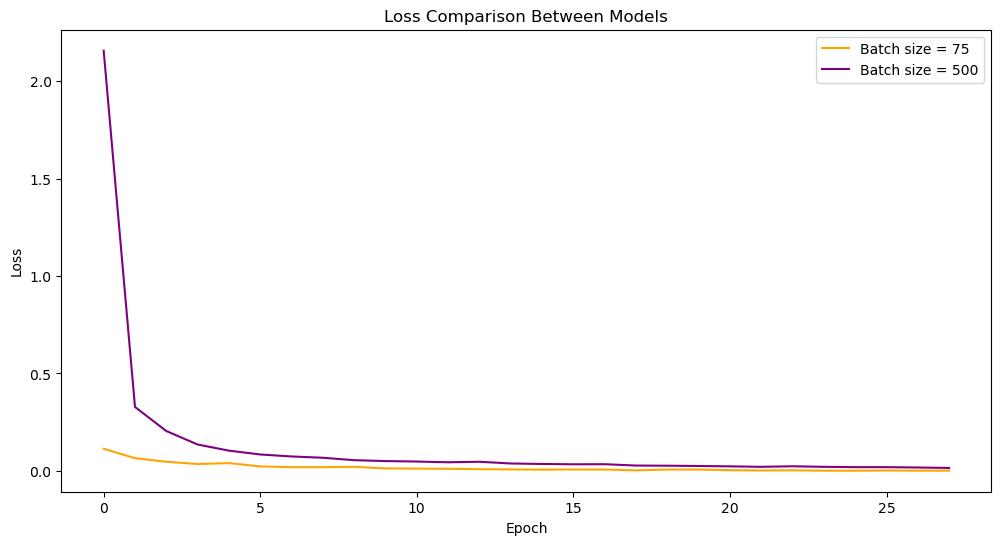

In [12]:
# Plot loss comparison
plt.figure(figsize=(12, 6))
plt.plot(np.arange(0, total_epochs, 1), train_losses_A, color="orange")
plt.plot(np.arange(0, total_epochs, 1), train_losses_B, color="purple")
plt.title('Loss Comparison Between Models')
plt.legend(['Batch size = 75', 'Batch size = 500'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

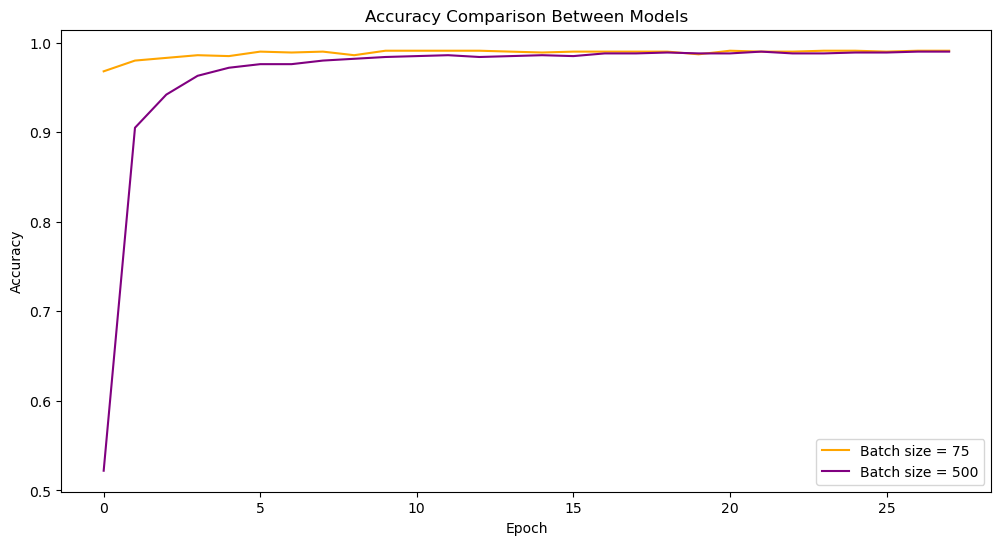

In [13]:
# Plot accuracy comparison
plt.figure(figsize=(12, 6))
plt.plot(np.arange(0, total_epochs, 1), test_acc_A, color="orange")
plt.plot(np.arange(0, total_epochs, 1), test_acc_B, color="purple")
plt.title('Accuracy Comparison Between Models')
plt.legend(['Batch size = 75', 'Batch size = 500'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


Evaluating for interpolation alpha = -2.0
Evaluating for interpolation alpha = -1.8
Evaluating for interpolation alpha = -1.6
Evaluating for interpolation alpha = -1.4000000000000001
Evaluating for interpolation alpha = -1.2000000000000002
Evaluating for interpolation alpha = -1.0000000000000002
Evaluating for interpolation alpha = -0.8000000000000003
Evaluating for interpolation alpha = -0.6000000000000003
Evaluating for interpolation alpha = -0.40000000000000036
Evaluating for interpolation alpha = -0.2000000000000004
Evaluating for interpolation alpha = -4.440892098500626e-16
Evaluating for interpolation alpha = 0.1999999999999993
Evaluating for interpolation alpha = 0.39999999999999947
Evaluating for interpolation alpha = 0.5999999999999996
Evaluating for interpolation alpha = 0.7999999999999994
Evaluating for interpolation alpha = 0.9999999999999991
Evaluating for interpolation alpha = 1.1999999999999993
Evaluating for interpolation alpha = 1.3999999999999995
Evaluating for interp

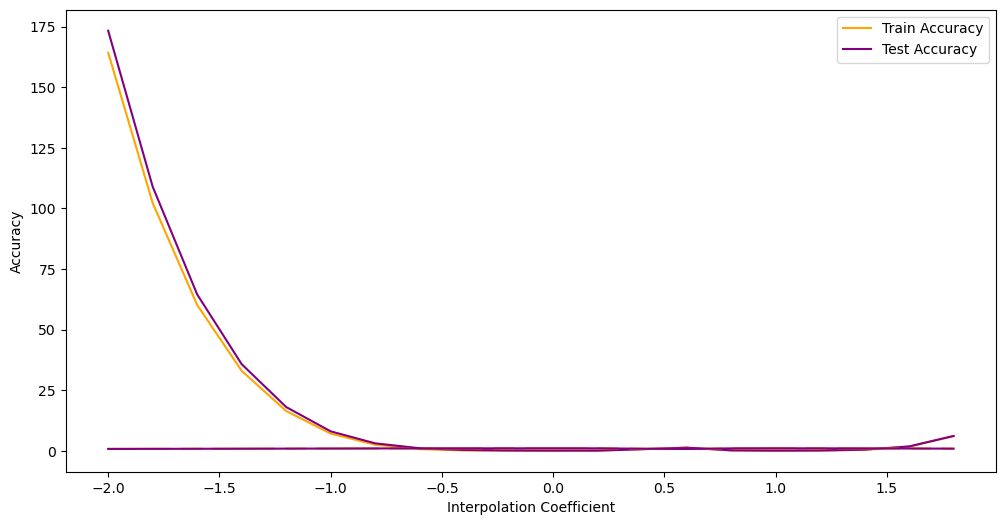

In [14]:
# Interpolation and parameter blending
alpha_values = np.arange(-2, 2, 0.2)
theta_values = []

for alpha in alpha_values:
    blended_params = (1 - alpha) * params_A + alpha * params_B
    theta_values.append(blended_params)

train_losses_alpha = []
test_losses_alpha = []
train_acc_alpha = []
test_acc_alpha = []

for i, theta in enumerate(theta_values):
    print(f'Evaluating for interpolation alpha = {alpha_values[i]}')
    interpolated_model = CustomNet()
    torch.nn.utils.vector_to_parameters(theta, interpolated_model.parameters())

    train_loss, train_acc = evaluate_model(interpolated_model, train_data_75)
    test_loss, test_acc = evaluate_model(interpolated_model, test_data_75)

    train_losses_alpha.append(train_loss)
    test_losses_alpha.append(test_loss)
    train_acc_alpha.append(train_acc)
    test_acc_alpha.append(test_acc)

# Plot interpolation results
plt.figure(figsize=(12, 6))
plt.plot(alpha_values, train_losses_alpha, color="orange")
plt.plot(alpha_values, test_losses_alpha, color="purple")
plt.xlabel('Interpolation Coefficient')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Test Loss'])

plt.plot(alpha_values, train_acc_alpha, dashes=[30, 5, 10, 5], color="orange")
plt.plot(alpha_values, test_acc_alpha, color="purple")
plt.xlabel('Interpolation Coefficient')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.show()